In [1]:
#Gerekli kütüphanelerin kurulması
!pip install pandas scikit-learn shap matplotlib


   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 977.2 kB/s eta 0:00:03
   -------------- ------------------------- 1.0/2.8 MB 1.4 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.0 MB/s eta 0:00:00
   -------------------------------------

In [2]:
#kodlama türünü görmek için
import chardet
#veri setini yükleyip analiz etmesini bekliyoruz
with open("2017-yl-mahalle-bazl-bina-saylar.csv", "rb") as f:
    result = chardet.detect(f.read(10000))  # İlk 10 KB'yi analiz et
print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.729635, 'language': ''}


In [3]:
#Veri setinin içeriğini anlamak adına ilk satırların okunması
import pandas as pd
df = pd.read_csv("2017-yl-mahalle-bazl-bina-saylar.csv", encoding="ISO-8859-9")
print(df.head())



  ilce_adi;mahalle_adi;mahalle_uavt;1980_oncesi;1980-2000_arasi;2000_sonrasi;1-4 kat_arasi;5-9 kat_arasi;9-19 kat_arasi
0        ADALAR;BURGAZADA;40139;433;214;173;802;18;0                                                                   
1      ADALAR;HEYBELİADA;40142;836;347;212;1359;36;0                                                                   
2        ADALAR;KINALIADA;40143;610;244;158;923;89;0                                                                   
3           ADALAR;MADEN;40140;863;510;308;1637;44;0                                                                   
4           ADALAR;NİZAM;40141;842;426;217;1434;51;0                                                                   


In [4]:
import pandas as pd

# CSV'yi ; ile ayrılmış olarak oku
df = pd.read_csv("2017-yl-mahalle-bazl-bina-saylar.csv", encoding="ISO-8859-9")
# İlk 5 satırı göster
print(df.head())

# Veri hakkında genel bilgi al
print(df.info())

# Eksik değer kontrolü
print(df.isnull().sum())


  ilce_adi;mahalle_adi;mahalle_uavt;1980_oncesi;1980-2000_arasi;2000_sonrasi;1-4 kat_arasi;5-9 kat_arasi;9-19 kat_arasi
0        ADALAR;BURGAZADA;40139;433;214;173;802;18;0                                                                   
1      ADALAR;HEYBELİADA;40142;836;347;212;1359;36;0                                                                   
2        ADALAR;KINALIADA;40143;610;244;158;923;89;0                                                                   
3           ADALAR;MADEN;40140;863;510;308;1637;44;0                                                                   
4           ADALAR;NİZAM;40141;842;426;217;1434;51;0                                                                   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 1 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                  

In [6]:
print(df.columns.tolist())


['ilce_adi;mahalle_adi;mahalle_uavt;1980_oncesi;1980-2000_arasi;2000_sonrasi;1-4 kat_arasi;5-9 kat_arasi;9-19 kat_arasi']


In [17]:
#İlçe bazlı toplamın bulunması

#Binalar ve katlar
binalar_katlar = [
    '1980_oncesi',
    '1980-2000_arasi',
    '2000_sonrasi',
    '1-4 kat_arasi',
    '5-9 kat_arasi',
    '9-19 kat_arasi'
]
# binalar ve katları ilçe adına göre gruplama
ilce_bazli_toplam = df.groupby('ilce_adi')[binalar_katlar].sum()

print(ilce_bazli_toplam)


               1980_oncesi  1980-2000_arasi  2000_sonrasi  1-4 kat_arasi  \
ilce_adi                                                                   
ADALAR                3584             1741          1068           6155   
ARNAVUTKÖY              96            19203         12642          28957   
ATAŞEHİR              7735            10297          9551          18774   
AVCILAR               2596            14287          9879          16513   
BAHÇELİEVLER          3892            15483          3901           5364   
BAKIRKÖY              4869             5092          1989           6372   
BAYRAMPAŞA            8295            10240          2417          10657   
BAĞCILAR              6072            28546          7821          18148   
BAŞAKŞEHİR             814            13620         11357          21176   
BEYKOZ               15981            18352         16868          48690   
BEYLİKDÜZÜ              41             6221          6491           8054   
BEYOĞLU     

<Figure size 500x500 with 0 Axes>

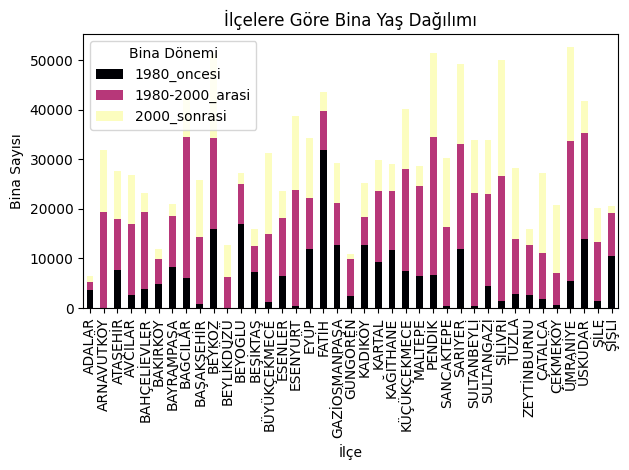

In [28]:
import matplotlib.pyplot as plt
# Grafik boyutu
plt.figure(figsize=(5,5))
# grafik
ilce_bazli_toplam[['1980_oncesi', '1980-2000_arasi', '2000_sonrasi']].plot(
    kind='bar',
    stacked=True,
    colormap='magma'
)
#grafiğin başlığı
plt.title("İlçelere Göre Bina Yaş Dağılımı")
#y ekseni bina sayısını gösterir
plt.ylabel("Bina Sayısı")
#x ekseni ilçe sayısını ifade eder
plt.xlabel("İlçe")
plt.legend(title="Bina Dönemi")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

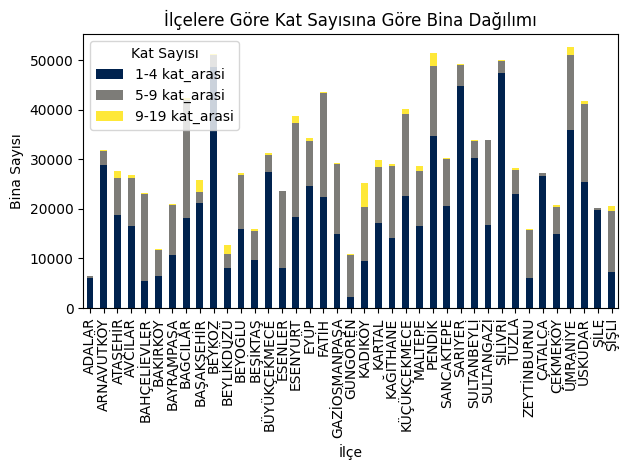

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
#kat yaşına göre grafikleştirme
ilce_bazli_toplam[['1-4 kat_arasi', '5-9 kat_arasi', '9-19 kat_arasi']].plot(
    kind='bar',
    stacked=True,
    colormap='cividis'
)
plt.title("İlçelere Göre Kat Sayısına Göre Bina Dağılımı")
plt.ylabel("Bina Sayısı")
plt.xlabel("İlçe")
plt.legend(title="Kat Sayısı")
plt.tight_layout()
plt.show()


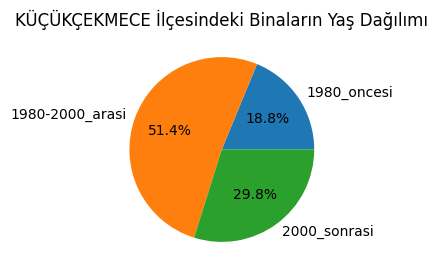

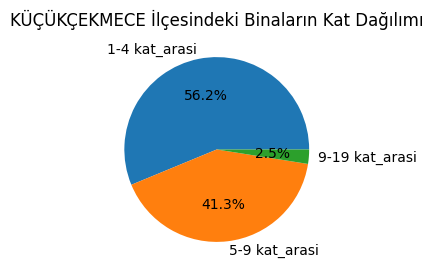

In [38]:
# Belirli bir ilçeye göre binaların yaşını analiz eden grafik
kucukcekmece_binalar = ilce_bazli_toplam.loc['KÜÇÜKÇEKMECE', ['1980_oncesi', '1980-2000_arasi', '2000_sonrasi']]
#Grafik çizimi
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.pie(
    kucukcekmece_binalar,
    labels=kucukcekmece_binalar.index,
    autopct='%1.1f%%'
)
plt.title("KÜÇÜKÇEKMECE İlçesindeki Binaların Yaş Dağılımı")
plt.show()
#Belirli bir ilçenin kat dağılımı
kucukcekmece_katlar = ilce_bazli_toplam.loc['KÜÇÜKÇEKMECE', ['1-4 kat_arasi', '5-9 kat_arasi', '9-19 kat_arasi']]
#Grafik çizimi
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.pie(
    kucukcekmece_katlar,
    labels=kucukcekmece_katlar.index,
    autopct='%1.1f%%'
)
plt.title("KÜÇÜKÇEKMECE İlçesindeki Binaların Kat Dağılımı")
plt.show()


In [2]:
import pandas as pd

# CSV'yi ; ile ayrılmış olarak oku
df = pd.read_csv("2017-yl-mahalle-bazl-bina-saylar.csv", encoding="ISO-8859-9", sep=';')

# Toplam bina sayısı için kolon oluşturulur.Bina sayıları toplanır bu kolona aktarılır.
df['toplam_bina'] = df['1980_oncesi'] + df['1980-2000_arasi'] + df['2000_sonrasi']


# 2025 yılı baz alınarak ortalama bina yaşı tahmini 
df['ortalama_bina_yasi'] = ( df['1980_oncesi'] * 45 +      # 2025 yılına göre 1980 öncesi
                            df['1980-2000_arasi'] * 35 +  # 1980-2000 arası ortalama 20 yıl
                            df['2000_sonrasi'] * 25        # 2000 sonrası ortalama 25 yıl
                            ) / df['toplam_bina']

# Toplam kat sayısı bulunur
df['toplam_kat_bina'] = df['1-4 kat_arasi'] + df['5-9 kat_arasi'] + df['9-19 kat_arasi']

#Toplam kat sayısından yararlanarak ortalama kat sayısı bulunur
df['ortalama_kat_sayisi'] = (
    df['1-4 kat_arasi'] * 2.5 +    # (1+4)/2 =2.5
    df['5-9 kat_arasi'] * 7 +      #(5+9)/2= 7
    df['9-19 kat_arasi'] * 14      #(9+19)/2 = 14
) / df['toplam_kat_bina']

# Son hali
print(df[['ilce_adi','mahalle_adi','ortalama_bina_yasi','ortalama_kat_sayisi','toplam_bina']].head(5))


  ilce_adi mahalle_adi  ortalama_bina_yasi  ortalama_kat_sayisi  toplam_bina
0   ADALAR   BURGAZADA           38.170732             2.598780          820
1   ADALAR  HEYBELİADA           39.473118             2.616129         1395
2   ADALAR   KINALIADA           39.466403             2.895751         1012
3   ADALAR       MADEN           38.301606             2.617787         1681
4   ADALAR       NİZAM           39.208754             2.654545         1485


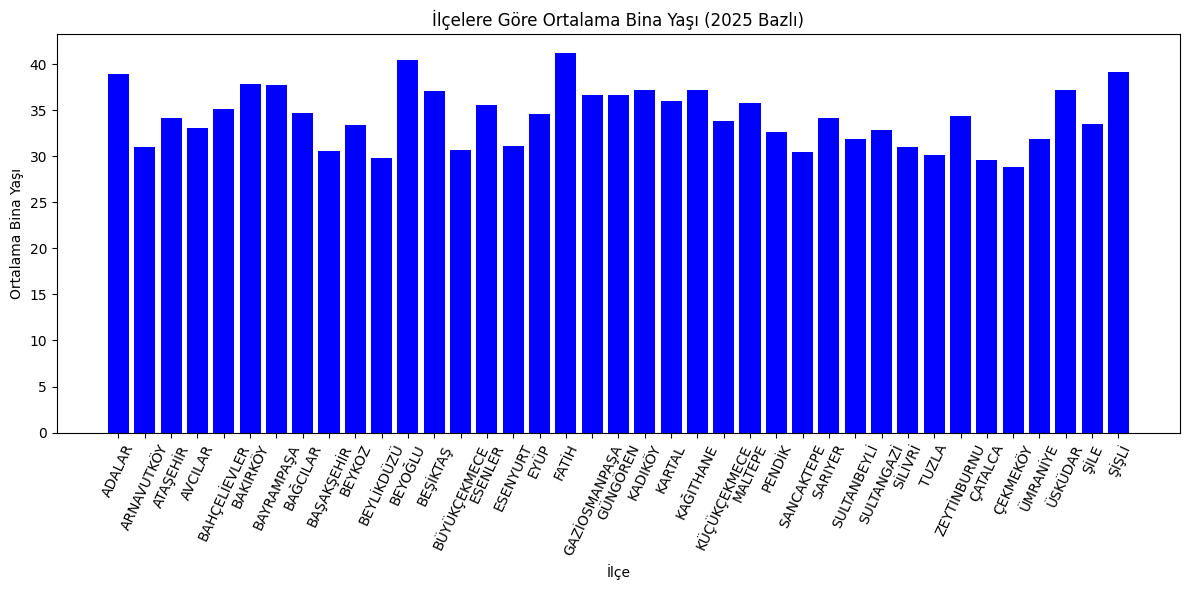

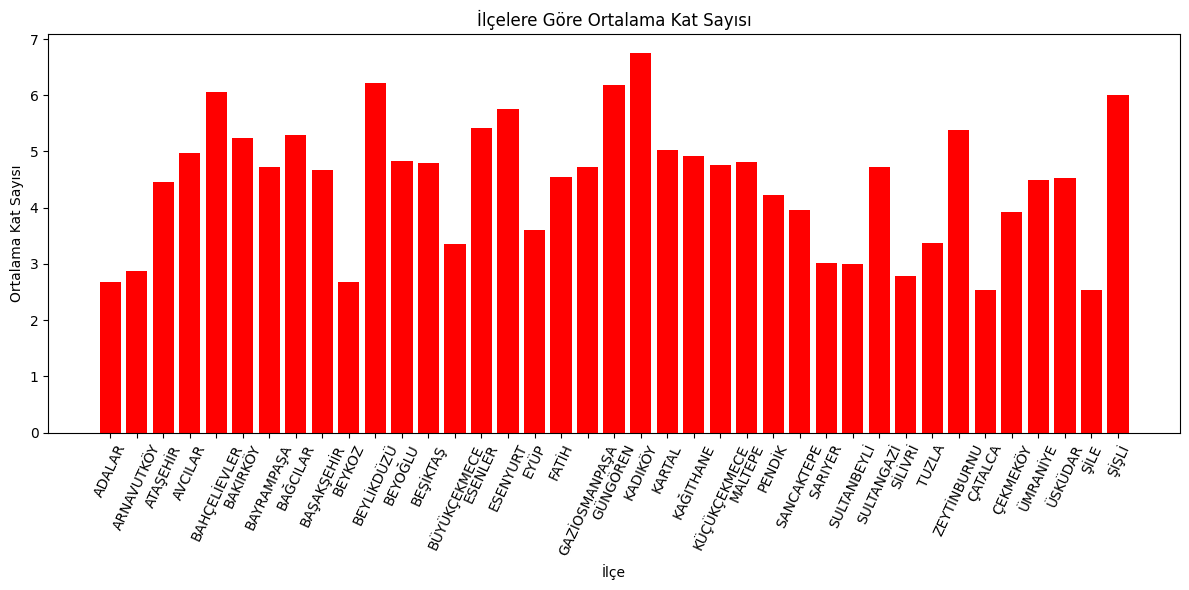

In [8]:
#Her ilçe için ortalama bina yaşı grafik
import matplotlib.pyplot as plt

# İlçe bazında ortalama bina yaşı hesaplama
ilce_grup = df.groupby('ilce_adi').mean(numeric_only=True)

# Ortalama bina yaşı grafiği
plt.figure(figsize=(12,6))
plt.bar(ilce_grup.index, ilce_grup['ortalama_bina_yasi'], color='blue')
plt.xlabel('İlçe')
plt.ylabel('Ortalama Bina Yaşı')
plt.title('İlçelere Göre Ortalama Bina Yaşı (2025 Bazlı)')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

#Her ilçe için ortalama kat sayısı grafik 
plt.figure(figsize=(12,6))
plt.bar(ilce_grup.index, ilce_grup['ortalama_kat_sayisi'], color='red')
plt.xlabel('İlçe')
plt.ylabel('Ortalama Kat Sayısı')
plt.title('İlçelere Göre Ortalama Kat Sayısı')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()


In [9]:
                                                 #Ortalama bina yaşı ve ortalama kat sayısı ile risk skorunun belirlenmesi
import pandas as pd
#Veri seti yüklenir
df = pd.read_csv("2017-yl-mahalle-bazl-bina-saylar.csv", encoding="ISO-8859-9", sep=';')

# Toplam bina sayısı için kolon oluşturulur.Bina sayıları toplanır bu kolona aktarılır.
df['toplam_bina'] = df['1980_oncesi'] + df['1980-2000_arasi'] + df['2000_sonrasi']

# 2025 yılı baz alınarak ortalama bina yaşı tahmini 
df['ortalama_bina_yasi'] = ( df['1980_oncesi'] * 45 +      # 2025 yılına göre 1980 öncesi
                            df['1980-2000_arasi'] * 35 +  # 1980-2000 arası ortalama 20 yıl
                            df['2000_sonrasi'] * 25        # 2000 sonrası ortalama 25 yıl
                            ) / df['toplam_bina']

# Toplam kat sayısı bulunur
df['toplam_kat_bina'] = df['1-4 kat_arasi'] + df['5-9 kat_arasi'] + df['9-19 kat_arasi']

#Toplam kat sayısından yararlanarak ortalama kat sayısı bulunur
df['ortalama_kat_sayisi'] = (
    df['1-4 kat_arasi'] * 2.5 +    # (1+4)/2 =2.5
    df['5-9 kat_arasi'] * 7 +      #(5+9)/2= 7
    df['9-19 kat_arasi'] * 14      #(9+19)/2 = 14
) / df['toplam_kat_bina']


#Ortalama bina yaşının risk skoruna etkisi =  %60 . Ortalama kat sayısının ise %40.
#Diğer değerler normalize edilmek amacıyla kullanılmıştır (50-15)
df['risk_skoru'] = (df['ortalama_bina_yasi']/50)*0.6 + (df['ortalama_kat_sayisi']/15)*0.4
print(df['risk_skoru'].describe())


count    959.000000
mean       0.355142
std        0.104920
min        0.126667
25%        0.273516
50%        0.350205
75%        0.436317
max        0.588746
Name: risk_skoru, dtype: float64


  ilce_adi mahalle_adi  ortalama_bina_yasi  ortalama_kat_sayisi  toplam_bina
0   ADALAR   BURGAZADA           27.396341             2.598780          820
1   ADALAR  HEYBELİADA           29.706093             2.616129         1395
2   ADALAR   KINALIADA           29.713439             2.895751         1012
3   ADALAR       MADEN           27.519334             2.617787         1681
4   ADALAR       NİZAM           29.148148             2.654545         1485
count    959.000000
mean       0.355142
std        0.104920
min        0.126667
25%        0.273516
50%        0.350205
75%        0.436317
max        0.588746
Name: risk_skoru, dtype: float64
MSE: 4.354593110975955e-05
R2: 0.9960953639213624


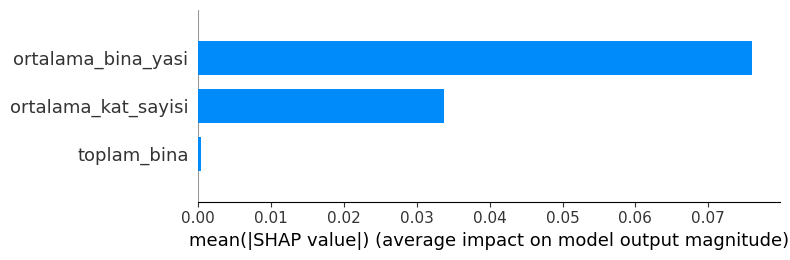

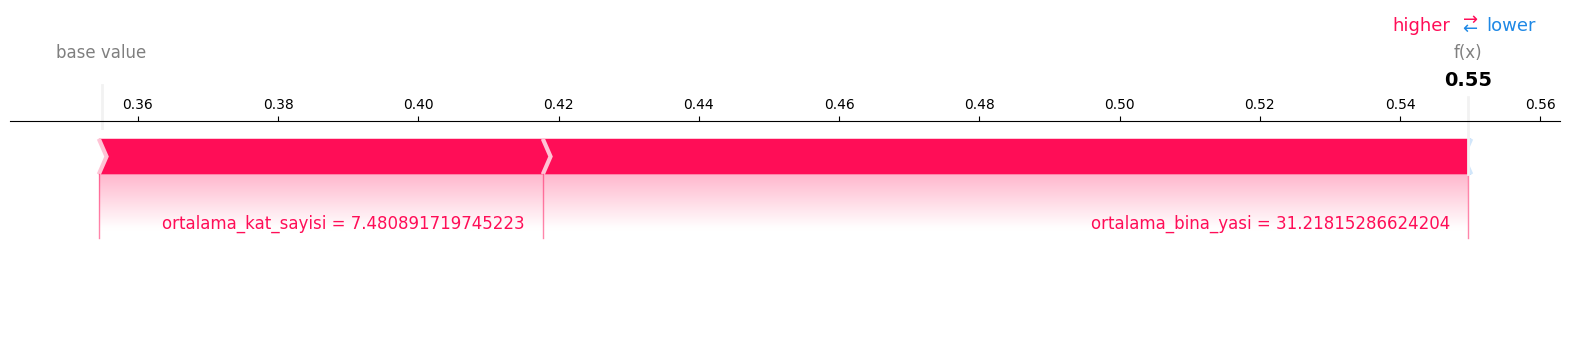

   ilce_adi          mahalle_adi  ortalama_bina_yasi  ortalama_kat_sayisi  \
0     ŞİŞLİ               19.May           31.218153             7.480892   
1     FATİH         SULTAN AHMET           33.383562             2.697260   
2   ESENLER         FEVZİ ÇAKMAK           21.471698             6.270566   
3  ÜMRANİYE  FATİH SULTAN MEHMET           11.301370             5.376712   
4     ŞİŞLİ          MECİDİYEKÖY           30.547945             6.349772   

   toplam_bina  gercek_risk  tahmin_risk  
0          628     0.574108     0.549722  
1          365     0.472530     0.483082  
2         1325     0.424875     0.424517  
3          219     0.278995     0.279223  
4         1095     0.535903     0.536867  


In [3]:
import pandas as pd

# CSV'yi ; ile ayrılmış olarak oku
df = pd.read_csv("2017-yl-mahalle-bazl-bina-saylar.csv", encoding="ISO-8859-9", sep=';')
# Toplam bina sayısı
df['toplam_bina'] = df['1980_oncesi'] + df['1980-2000_arasi'] + df['2000_sonrasi']

# Ortalama bina yaşı tahmini (örnek değerler)
df['ortalama_bina_yasi'] = (
    df['1980_oncesi'] * 40 +      # 1980 öncesi ortalama 40 yıl
    df['1980-2000_arasi'] * 20 +  # 1980-2000 arası ortalama 20 yıl
    df['2000_sonrasi'] * 5        # 2000 sonrası ortalama 5 yıl
) / df['toplam_bina']

# Kat sayısı ağırlıklı ortalama
df['toplam_kat_bina'] = df['1-4 kat_arasi'] + df['5-9 kat_arasi'] + df['9-19 kat_arasi']

df['ortalama_kat_sayisi'] = (
    df['1-4 kat_arasi'] * 2.5 +
    df['5-9 kat_arasi'] * 7 +
    df['9-19 kat_arasi'] * 14
) / df['toplam_kat_bina']

# Son hali
print(df[['ilce_adi','mahalle_adi','ortalama_bina_yasi','ortalama_kat_sayisi','toplam_bina']].head())

df['risk_skoru'] = (df['ortalama_bina_yasi']/50)*0.6 + (df['ortalama_kat_sayisi']/15)*0.4

print(df['risk_skoru'].describe())

#Makine öğrenmesi modelinin risk skorunu bulması
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Modele ort_bina_yaşı- ort_kat_sayısı ve toplam bina gibi test verilerini verip risk skorunu tahmin etmesi beklenir
X = df[['ortalama_bina_yasi','ortalama_kat_sayisi','toplam_bina']]
y = df['risk_skoru']

#%20 test verisi
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Model eğitimi
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

#Model tahmini
y_pred = model.predict(X_test)

#Model performansını ölçmek için kütüphane
from sklearn.metrics import mean_squared_error, r2_score
#Model performansı
print("MSE:", mean_squared_error(y_test, y_pred)) #MSE : ne kadar sapma var
print("R2:", r2_score(y_test, y_pred))            #R2 : Modelin Açıklama Gücü

#shap ile model açıklaması
import shap
#TreeExplainer, ağaç tabanlı modelleri (Random Forest, XGBoost, LightGBM gibi) açıklamak için kullanılır.
# Burada modelin nasıl tahmin yaptığını öğrenen bir “açıklayıcı nesne”(explainer) oluşturulur.
#model : eğittiğimiz random forest modeli
explainer = shap.TreeExplainer(model)
# test setindeki her gözlem için her özelliğin tahmine katkısını hesaplar.Hangi özelliğin katkısının güçlü ya da zayıf olduğunu görmek için
shap_values = explainer.shap_values(X_test)
#Bulunan değişkenlerin model için ne kadar önemli olduğu grafikle görselleştirilir. 
shap.summary_plot(shap_values, X_test, plot_type="bar")


#SHAP Force Plot ile Tahmin Açıklaması
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)
                                  # Gerçek ve Tahmin Değerlerini Mahalle Bilgisiyle Tablo Haline Getirme
# Test verisinin indekslerini sıfırlama:
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
#Model tahminlerini pandas serisine çevirme:
y_pred_series = pd.Series(y_pred)
# Mahalle bilgilerini orijinal veri setinden alma:
mahalle_info = df.loc[X_test.index, ['ilce_adi', 'mahalle_adi']].reset_index(drop=True)
# Sonuç Tablosu
results_df = pd.concat([mahalle_info, X_test_reset, y_test_reset.rename('gercek_risk'), y_pred_series.rename('tahmin_risk')], axis=1)

print(results_df.head())


In [8]:
!pip install folium



   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



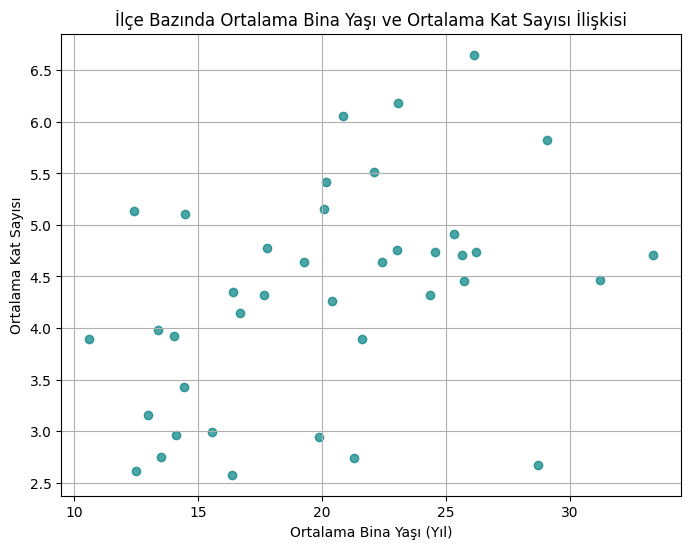

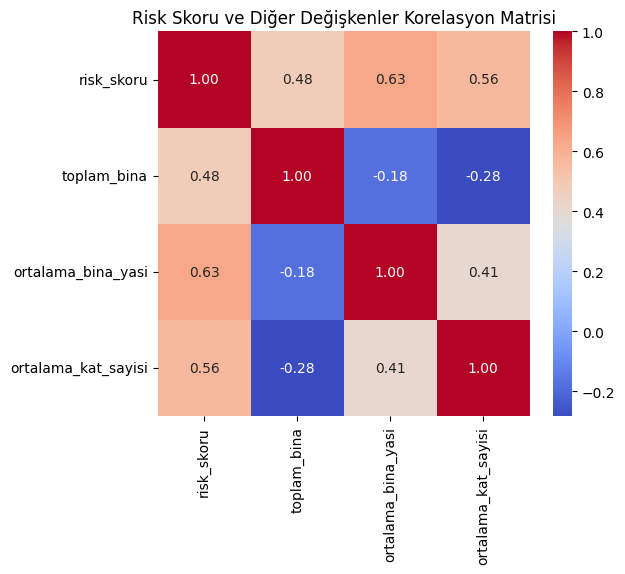

In [2]:
                                                    #4. Korelasyon ve Dağılım Grafikleri

#Kütüphaneler içeri aktarılır.
#veri işleme
import pandas as pd
#normalizasyon
from sklearn.preprocessing import MinMaxScaler
#görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri Yükleme
df = pd.read_csv("2017-yl-mahalle-bazl-bina-saylar.csv", encoding="ISO-8859-9", sep=';')

# 2.Her ilçedeki bina sayıları toplanır.Örneğin küçükçekmecede kaç bina var.
#Bu sayede her ilçede hangi dönemde kaç bina yapılmış ve kaç katlı binalar var görülebiliriz
df_grouped = df.groupby('ilce_adi').agg({
    '1980_oncesi': 'sum',
    '1980-2000_arasi': 'sum',
    '2000_sonrasi': 'sum',
    '1-4 kat_arasi': 'sum',
    '5-9 kat_arasi': 'sum',
    '9-19 kat_arasi': 'sum'
}).reset_index()

# 3. Toplam Bina Sayısı Hesaplama.Her ilçenin toplam bina sayısı bulunur
df_grouped['toplam_bina'] = df_grouped[['1980_oncesi', '1980-2000_arasi', '2000_sonrasi']].sum(axis=1)

# 4. Ortalama bina yaşı tahmin etme
df_grouped['ortalama_bina_yasi'] = (
    df_grouped['1980_oncesi'] * 40 + 
    df_grouped['1980-2000_arasi'] * 20 +
    df_grouped['2000_sonrasi'] * 5
) / df_grouped['toplam_bina']

# 5. Ortalama Kat Sayısı Hesaplama
df_grouped['ortalama_kat_sayisi'] = (
    df_grouped['1-4 kat_arasi'] * 2.5 +
    df_grouped['5-9 kat_arasi'] * 7 +
    df_grouped['9-19 kat_arasi'] * 14
) / df_grouped[['1-4 kat_arasi', '5-9 kat_arasi', '9-19 kat_arasi']].sum(axis=1)

# 6. Değişkenleri Normalize Etme. Skor hesaplaması için değerleri 0–1 aralığına çekilir.
# Böylece karşılaştırılabilir olunuyor
scaler = MinMaxScaler()
df_grouped[['toplam_bina_norm', 'ortalama_bina_yasi_norm', 'ortalama_kat_sayisi_norm']] = scaler.fit_transform(
    df_grouped[['toplam_bina', 'ortalama_bina_yasi', 'ortalama_kat_sayisi']]
)

# 7. Risk Skoru Hesaplama. Amaç: İlçeleri risk açısından sıralamak.
df_grouped['risk_skoru'] = (
    0.4 * df_grouped['toplam_bina_norm'] +           # %40 toplam bina sayısı
    0.3 * df_grouped['ortalama_bina_yasi_norm'] +    #%30 bina yaşı
    0.3 * df_grouped['ortalama_kat_sayisi_norm']     #%30 kat sayısı
)

# Her ilçeyi bir nokta olarak çizer: Y ekseni: Ortalama kat sayısı X ekseni: Ortalama bina yaşı
# Amaç: Eski binalar genelde daha mı az katlı, yoksa tam tersi mi? 
plt.figure(figsize=(8,6))
plt.scatter(df_grouped['ortalama_bina_yasi'], df_grouped['ortalama_kat_sayisi'], alpha=0.7, color='teal')
plt.title('İlçe Bazında Ortalama Bina Yaşı ve Ortalama Kat Sayısı İlişkisi')
plt.xlabel('Ortalama Bina Yaşı (Yıl)')
plt.ylabel('Ortalama Kat Sayısı')
plt.grid(True)
plt.show()

# --- Korelasyon Isı Haritası ---
#Risk skoru ile diğer değişkenler arasındaki istatistiksel ilişkileri ölçmek için
# Amaç: Hangi değişken risk skorunu en çok etkiliyor görmek.
corr = df_grouped[['risk_skoru', 'toplam_bina', 'ortalama_bina_yasi', 'ortalama_kat_sayisi']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Risk Skoru ve Diğer Değişkenler Korelasyon Matrisi')
plt.show()


In [9]:
#------------- binaların risk skorunu hesaplamak ve ısı haritası (heatmap) üzerinde görselleştirmek.--------

#Kütüphaneler içeri aktarılır.
#Veri okuma
import pandas as pd
#Normalizasyon
from sklearn.preprocessing import MinMaxScaler
#Harita çizimi
import folium
#Isı haritası oluşturma
from folium.plugins import HeatMap

# 1. Veri Yükleme 
df = pd.read_csv("2017-yl-mahalle-bazl-bina-saylar.csv", encoding="ISO-8859-9", sep=';')

# 2. İlçe Bazında toplam kaç bina kaç katlı yapı var bulunur.
df_grouped = df.groupby('ilce_adi').agg({
    '1980_oncesi': 'sum',
    '1980-2000_arasi': 'sum',
    '2000_sonrasi': 'sum',
    '1-4 kat_arasi': 'sum',
    '5-9 kat_arasi': 'sum',
    '9-19 kat_arasi': 'sum'
}).reset_index()

# 3. Toplam Bina Sayısı Hesaplama
df_grouped['toplam_bina'] = df_grouped[['1980_oncesi', '1980-2000_arasi', '2000_sonrasi']].sum(axis=1)

# 4. Ortalama Bina Yaşı Hesaplama 
df_grouped['ortalama_bina_yasi'] = (
    df_grouped['1980_oncesi'] * 40 +    # 1980 öncesi yapılar yaklaşık 40 yaşında
    df_grouped['1980-2000_arasi'] * 20 +
    df_grouped['2000_sonrasi'] * 5
) / df_grouped['toplam_bina']

# 5. Ortalama Kat Sayısı Hesaplama
df_grouped['ortalama_kat_sayisi'] = (
    df_grouped['1-4 kat_arasi'] * 2.5 +
    df_grouped['5-9 kat_arasi'] * 7 +
    df_grouped['9-19 kat_arasi'] * 14
) / df_grouped[['1-4 kat_arasi', '5-9 kat_arasi', '9-19 kat_arasi']].sum(axis=1)

# 6. Değişkenleri Normalize Etme.0 ve 1 arasında bir değere dönüştürme
scaler = MinMaxScaler()
df_grouped[['toplam_bina_norm', 'ortalama_bina_yasi_norm', 'ortalama_kat_sayisi_norm']] = scaler.fit_transform(
    df_grouped[['toplam_bina', 'ortalama_bina_yasi', 'ortalama_kat_sayisi']]
)

# 7. Basit Risk Skoru Hesaplama 
df_grouped['risk_skoru'] = (
    0.4 * df_grouped['toplam_bina_norm'] +          # %40 toplam bina sayısı
    0.3 * df_grouped['ortalama_bina_yasi_norm'] +   #%30 bina yaşı 
    0.3 * df_grouped['ortalama_kat_sayisi_norm']    #%30 kat sayısı
)

# 8. İlçe Koordinatlarını Yükleme veya Tanımlama
# Burada İstanbul ilçeleri için koordinatlar bulunur
ilce_coords = {
    'Adalar': [40.870833, 29.122222],
    'Arnavutköy': [41.184890, 28.740098],
    'Ataşehir': [40.992444, 29.124077],
    'Avcılar': [40.979682, 28.721208],
    'Bağcılar': [41.039564, 28.856714],
    'Bahçelievler': [41.000245, 28.868799],
    'Bakırköy': [40.979017, 28.858571],
    'Başakşehir': [41.092639, 28.810600],
    'Bayrampaşa': [41.041914, 28.909138],
    'Beşiktaş': [41.043368, 29.028124],
    'Beykoz': [41.139499, 29.109901],
    'Beylikdüzü': [41.001508, 28.640925],
    'Beyoğlu': [41.038132, 28.985162],
    'Büyükçekmece': [41.020344, 28.585349],
    'Çatalca': [41.148819, 28.461269],
    'Çekmeköy': [41.028698, 29.200682],
    'Esenler': [41.049165, 28.876760],
    'Esenyurt': [41.034987, 28.678125],
    'Eyüpsultan': [41.099973, 28.935127],
    'Fatih': [41.015137, 28.979530],
    'Gaziosmanpaşa': [41.077769, 28.910572],
    'Güngören': [41.022299, 28.871635],
    'Kadıköy': [40.992839, 29.027984],
    'Kağıthane': [41.078847, 28.973184],
    'Kartal': [40.899312, 29.178928],
    'Küçükçekmece': [40.993919, 28.785644],
    'Maltepe': [40.954121, 29.125200],
    'Pendik': [40.878891, 29.254023],
    'Sancaktepe': [40.985976, 29.231037],
    'Sarıyer': [41.171906, 29.028025],
    'Silivri': [41.077530, 28.246726],
    'Sultanbeyli': [40.971992, 29.251288],
    'Sultangazi': [41.106494, 28.868829],
    'Şile': [41.176328, 29.698582],
    'Şişli': [41.061597, 28.987040],
    'Tuzla': [40.836871, 29.302452],
    'Ümraniye': [41.033640, 29.110191],
    'Üsküdar': [41.022348, 29.031767],
    'Zeytinburnu': [41.000817, 28.912603],
}

# 9. Sözlükten bir DataFrame yaratıyor. Koordinatlar risk skorlarıyla birleştiriliyor
coords_df = pd.DataFrame.from_dict(ilce_coords, orient='index', columns=['lat', 'lon']).reset_index()
coords_df.rename(columns={'index':'ilce_adi'}, inplace=True)
df_map = pd.merge(df_grouped, coords_df, on='ilce_adi', how='inner')

# 10.Haritayı İstanbul ortasına konumlandırmak
istanbul_map = folium.Map(location=[41.0082, 28.9784], zoom_start=10)

# Her ilçe için lat-lon ve risk skoruyla bir ısı haritası oluşturulur
heat_data = [[row['lat'], row['lon'], row['risk_skoru']] for idx, row in df_map.iterrows()]

#Isı Haritasını Haritaya Ekleme
HeatMap(heat_data, radius=25, max_zoom=13).add_to(istanbul_map)

# Haritayı kaydetme
istanbul_map.save('istanbul_deprem_risk_heatmap.html')
istanbul_map
